In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set()

In [5]:
data = pd.read_excel('../input/dataset/new_case.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index(['Date'])
data

,Total Confirmed
Date,
2020-01-30,1.0
2020-01-31,1.0
2020-02-01,1.0
2020-02-02,2.0
2020-02-03,3.0
...,...
2020-05-12,NaN
2020-05-13,NaN
2020-05-14,NaN


,Total Confirmed
Date,
2020-01-30,1.0
2020-01-31,1.0
2020-02-01,1.0
2020-02-02,2.0
2020-02-03,3.0
...,...
2020-05-01,37262.0
2020-05-02,39826.0
2020-05-03,42778.0


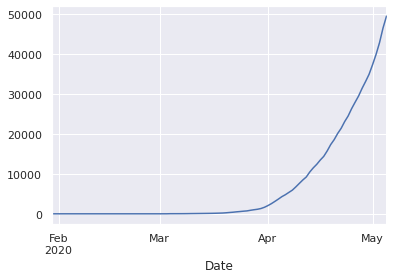

In [7]:
# SPLITING DATA INOT TRAIN AND TEST . HERE TELL WILL CONTAIN NAN FIELDS
train = data[:97]
valid = data[97:]

# # #plotting the data
train['Total Confirmed'].plot()
train

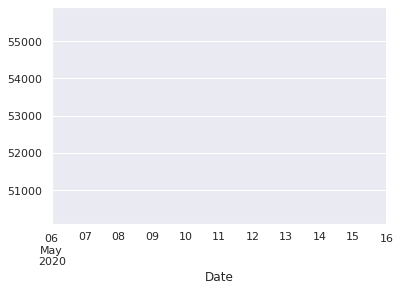

In [8]:
valid['Total Confirmed'].plot()

In [10]:
valid

,Total Confirmed
Date,
2020-05-06,53007.0
2020-05-07,NaN
2020-05-08,NaN
2020-05-09,NaN
2020-05-10,NaN
2020-05-11,NaN
2020-05-12,NaN
2020-05-13,NaN
2020-05-14,NaN


In [11]:
# importing pmdarima package
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 195 kB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 5.2 MB/s eta 0:00:01
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [12]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np

In [13]:
# Fit your model
model = pm.auto_arima(train, seasonal=True, m=6)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: Use

In [14]:
# FORECASTING FUTURE DATA
forecasts = model.predict(valid.shape[0])  # predict N steps into the future

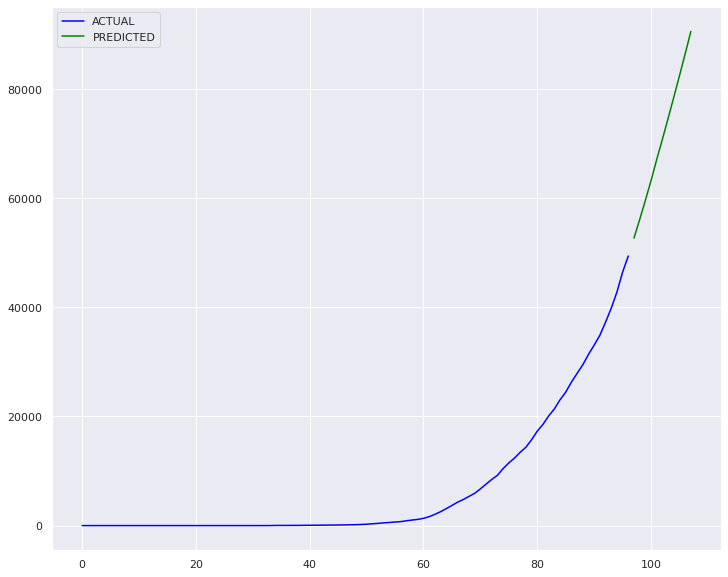

In [15]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data.shape[0])
plt.figure(figsize=(12,10))
plt.plot(x[:97], train, c='blue', label='ACTUAL')
plt.plot(x[97:], forecasts, c='green', label='PREDICTED')

plt.legend(loc='best')
plt.show()

In [16]:
for i in forecasts:
    print(i)

52685.29204440103
56075.32941696265
59581.6046750771
63218.02518975055
67102.17639965127
70800.62167069154
74620.9825201172
78500.92513333842
82442.9169393386
86451.02980267403
90561.34228966062


In [17]:
df = data['Total Confirmed'].unique()
print(df)

[1.0000e+00 2.0000e+00 3.0000e+00 5.0000e+00 6.0000e+00 2.8000e+01
 3.0000e+01 3.1000e+01 3.4000e+01 3.9000e+01 4.8000e+01 6.3000e+01
 7.1000e+01 8.1000e+01 9.1000e+01 1.0200e+02 1.1200e+02 1.2600e+02
 1.4600e+02 1.7100e+02 1.9800e+02 2.5600e+02 3.3400e+02 4.0300e+02
 4.9700e+02 5.7100e+02 6.5700e+02 7.3000e+02 8.8300e+02 1.0190e+03
 1.1390e+03 1.3260e+03 1.6350e+03 2.0590e+03 2.5450e+03 3.1050e+03
 3.6840e+03 4.2930e+03 4.7770e+03 5.3500e+03 5.9150e+03 6.7280e+03
 7.5990e+03 8.4530e+03 9.2110e+03 1.0454e+04 1.1485e+04 1.2371e+04
 1.3432e+04 1.4354e+04 1.5725e+04 1.7305e+04 1.8544e+04 2.0081e+04
 2.1373e+04 2.3040e+04 2.4448e+04 2.6283e+04 2.7890e+04 2.9458e+04
 3.1360e+04 3.3065e+04 3.4866e+04 3.7262e+04 3.9826e+04 4.2778e+04
 4.6434e+04 4.9405e+04 5.3007e+04        nan]


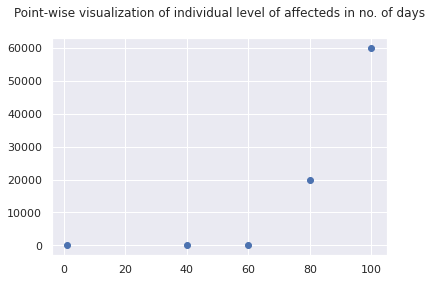

In [20]:
# x-axis values 
days = [1, 40, 60, 80, 100] 
  
# Y-axis values 
cases = [0,1,6,20000,60000] 
  
# Function to plot scatter 
plt.title("Point-wise visualization of individual level of affecteds in no. of days\n")
plt.scatter(days, cases) 